In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("FINAL_ARXIV_2025_copy.csv")

In [3]:
all_words = []

for paper in data['abstract']:
    all_words.extend(paper.split())

for paper in data['title']:
    all_words.extend(paper.split())

word_counts = pd.Series(all_words).value_counts()
word_counts = word_counts[word_counts > 1]

print(word_counts)

the             252597
of              159212
and             117754
a                78529
to               71316
                 ...  
change:              2
Halting              2
Wang,                2
Inclinations         2
Calibrations         2
Name: count, Length: 71718, dtype: int64


In [15]:
# Search for phrases in arXiv abstracts
search_phrases = ["machine learning", "high z", "high redshift", "high-z", "low z", 
"low redshift", "low-z", "spiral galaxy", "elliptical galaxy", 
"lenticular galaxy", "irregular galaxy" , "dwarf galaxy", "ellipticals", "spirals",
"lenticuars", "supernova", "supernovae", "SNIa", "Supernova Ia", "supernova Ia"]

count_phrases = []

for phrase in search_phrases:
    count_phrases.append(data['abstract'].str.contains(phrase, case=False).sum())

phrase_counts = dict(zip(search_phrases, count_phrases))

# Grouping terms that are variations of the same phrase
same_terms = {
    "high z": ["high z", "high redshift", "high-z"],
    "low z": ["low z", "low redshift", "low-z"],
    "spiral galaxy": ["spiral galaxy", "spirals"],
    "elliptical galaxy": ["elliptical galaxy", "ellipticals"],
    "lenticular galaxy": ["lenticular galaxy", "lenticuars"],
    "supernova": ["supernova", "supernovae"],
    "supernova Ia": ["supernova Ia", "SNIa"],
}

consolidated_counts = {}
accounted_for = set()

for main_phrase, aliases in same_terms.items():
    total = 0
    for alias in aliases:
        total += phrase_counts.get(alias, 0)
        accounted_for.add(alias)
    consolidated_counts[main_phrase] = total

for phrase, count in phrase_counts.items():
    if phrase not in accounted_for:
        consolidated_counts[phrase] = count

print(consolidated_counts)


{'high z': 462, 'low z': 185, 'spiral galaxy': 181, 'elliptical galaxy': 57, 'lenticular galaxy': 5, 'supernova': 2371, 'supernova Ia': 63, 'machine learning': 483, 'irregular galaxy': 6, 'dwarf galaxy': 187, 'Supernova Ia': 2}


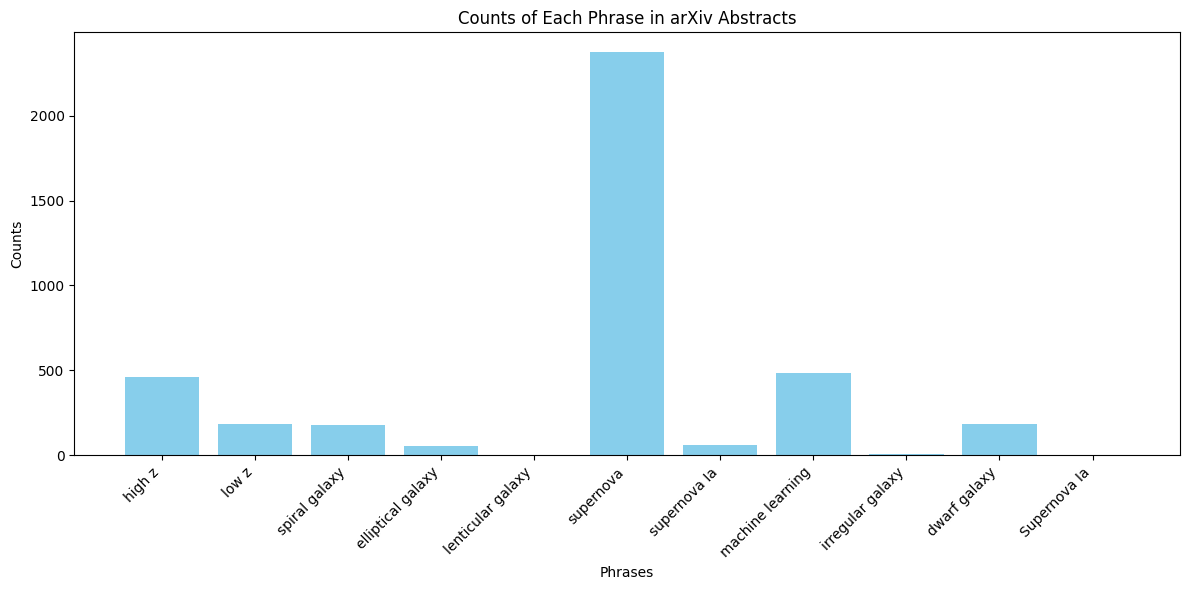

In [16]:
# Bar plot of phrase counts
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(consolidated_counts.keys(), consolidated_counts.values(), color='skyblue')
plt.xlabel('Phrases')
plt.ylabel('Counts')
plt.title('Counts of Each Phrase in arXiv Abstracts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
